In [1]:
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [9]:
data_path = './data/'
df_train = pd.read_csv(data_path + 'sk_train.csv', header=None)
df_label = pd.read_csv(data_path + 'sk_trainLabels.csv', header=None)
df_test =  pd.read_csv(data_path + 'sk_test.csv', header=None)

In [10]:
print(df_train.shape)
print(df_label.shape)
print(df_test.shape)
df_train.head()

(1000, 40)
(1000, 1)
(9000, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [11]:
df_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
dtype: object

In [12]:
df_label.head()

,0
0,1
1,0
2,0
3,1
4,0


In [13]:
# check missing value
for col in df_train.columns:
    if np.sum(df_train[col].isnull()) > 0:
        print(f' {col} missing column : {np.sum(df_train[col].isnull())} ')

for col in df_test.columns:
    if np.sum(df_test[col].isnull()) > 0:
        print(f' {col} missing column : {np.sum(df_test[col].isnull())} ')

In [14]:
df = pd.concat([df_train, df_test], axis = 0)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.013192,0.001383,-0.003946,0.007526,1.245419,0.004777,0.482261,-0.019293,0.008834,-0.006358,...,-0.013957,0.008849,-0.483455,0.013397,-0.506193,0.001272,0.462830,-0.001153,-0.992198,0.546830
std,1.009349,1.011906,0.994916,0.987139,4.528688,0.998536,2.103942,2.207343,0.990366,0.993736,...,1.004332,1.003092,2.206264,1.016431,2.099750,1.008284,2.191893,0.999854,1.984084,2.015055
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.680997,-0.670276,-0.659183,-1.680560,-0.691660,-0.891757,-1.529383,-0.655096,-0.668706,...,-0.684672,-0.667442,-2.000167,-0.672987,-1.906929,-0.685246,-1.070657,-0.668577,-2.285685,-0.706822
50%,0.007831,0.005964,0.007842,0.007685,1.099622,0.011815,0.537073,-0.016925,-0.004664,-0.008251,...,-0.026835,0.000477,-0.474467,0.008598,-0.483344,0.002123,0.423683,0.001106,-0.991737,0.649536
75%,0.705158,0.684755,0.658525,0.676428,3.984070,0.687318,1.896219,1.459290,0.682634,0.655497,...,0.663270,0.685580,1.021786,0.687199,0.965055,0.669716,1.948785,0.669388,0.326726,1.904717
max,3.843549,3.583870,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.919426,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [15]:
# base model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score


x_train, x_test, y_train, y_test = train_test_split(df_train, df_label, test_size=0.25, random_state=4)
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.82


D:\Anacoda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacoda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# base summit

logreg = linear_model.LogisticRegression()
logreg.fit(df_train, df_label)
y_pred = logreg.predict(df_test)

t = list(range(1,9001))
data = {'Id': t, 'Solution': list(y_pred)}
re = pd.DataFrame(data=data)

re.to_csv('re1.csv', index=False)

D:\Anacoda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacoda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


column name: 0


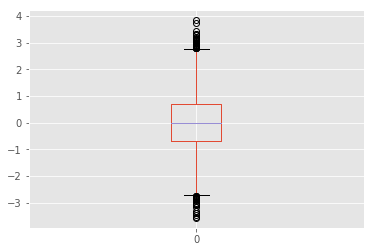

column name: 1


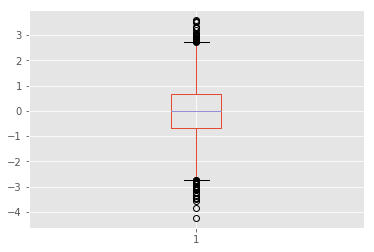

column name: 2


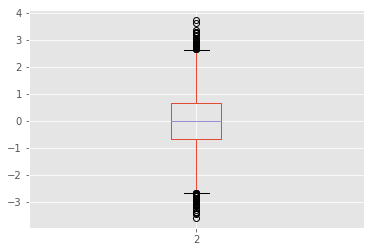

column name: 3


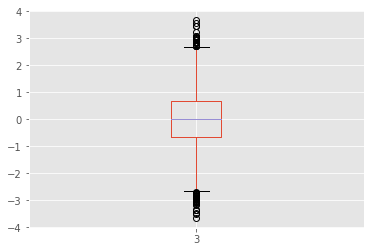

column name: 4


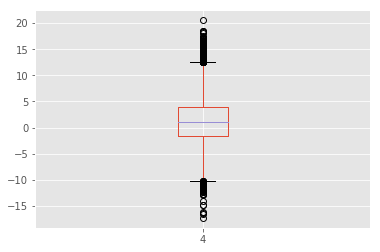

column name: 5


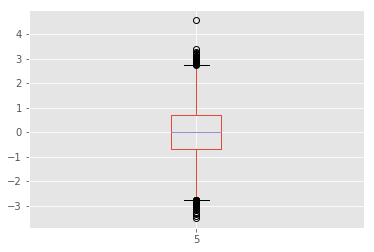

column name: 6


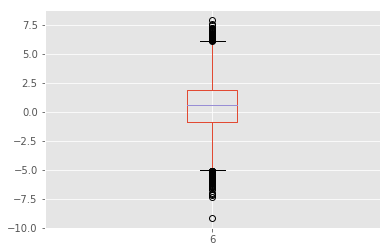

column name: 7


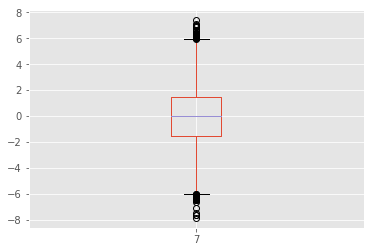

column name: 8


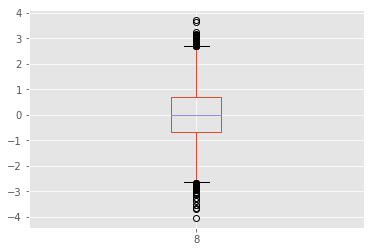

column name: 9


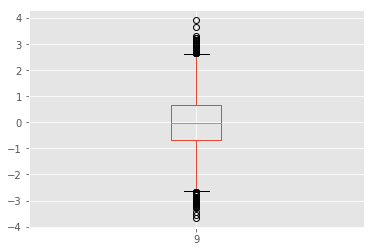

column name: 10


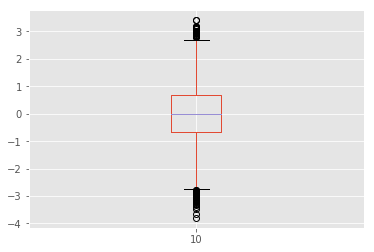

column name: 11


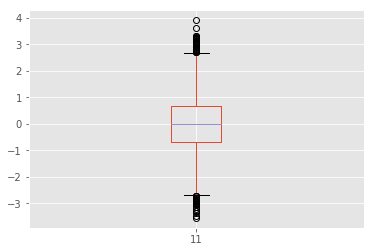

column name: 12


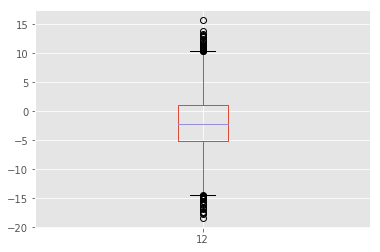

column name: 13


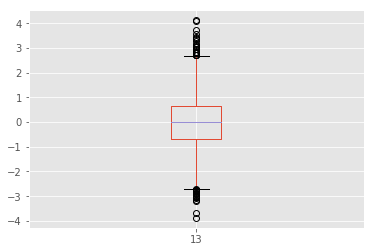

column name: 14


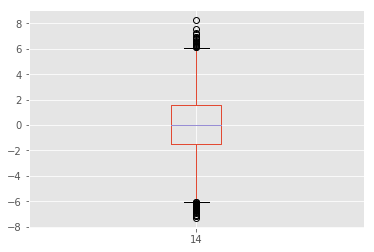

column name: 15


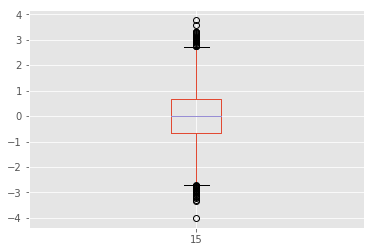

column name: 16


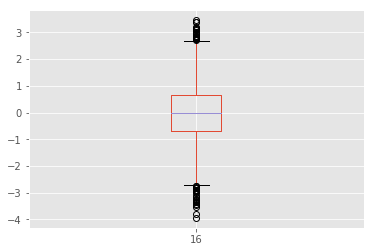

column name: 17


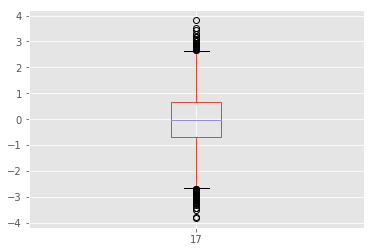

column name: 18


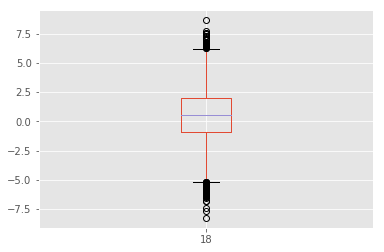

column name: 19


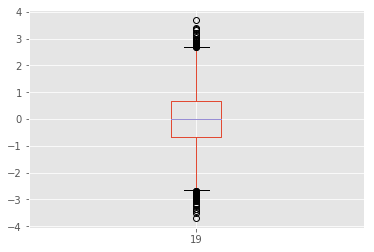

column name: 20


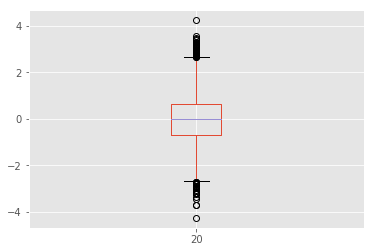

column name: 21


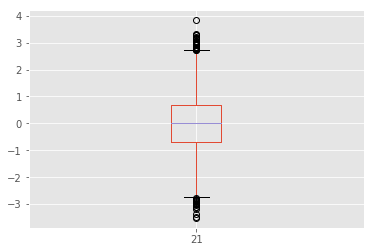

column name: 22


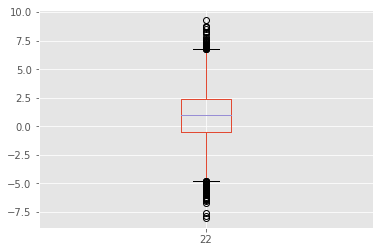

column name: 23


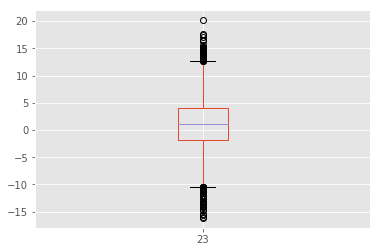

column name: 24


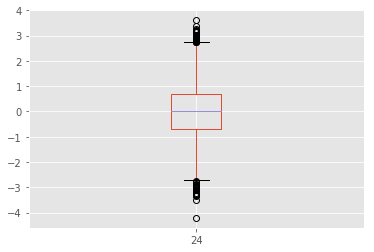

column name: 25


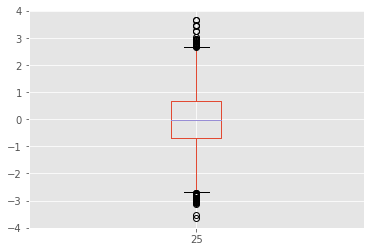

column name: 26


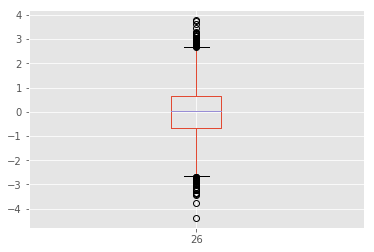

column name: 27


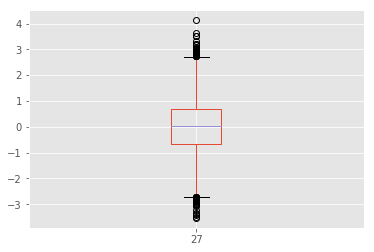

column name: 28


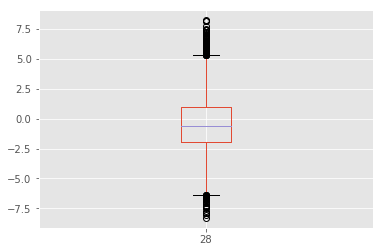

column name: 29


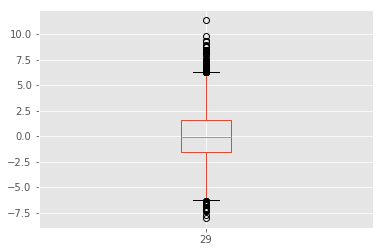

column name: 30


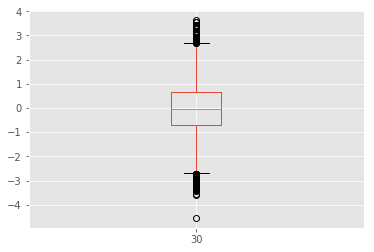

column name: 31


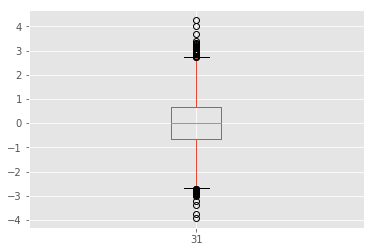

column name: 32


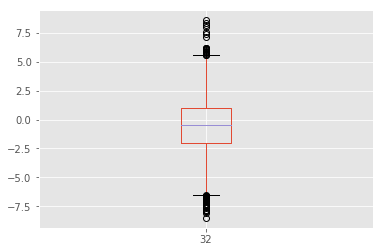

column name: 33


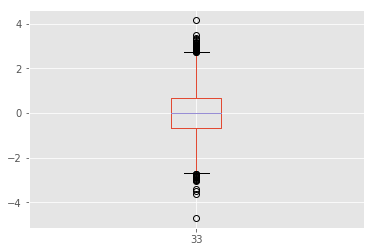

column name: 34


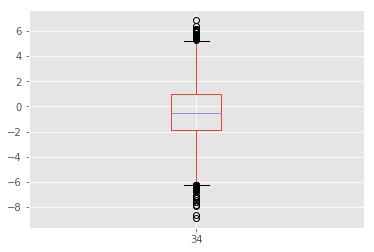

column name: 35


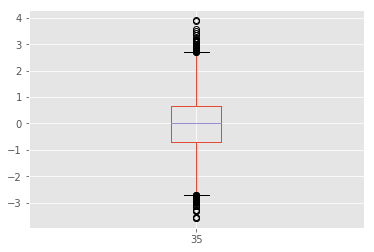

column name: 36


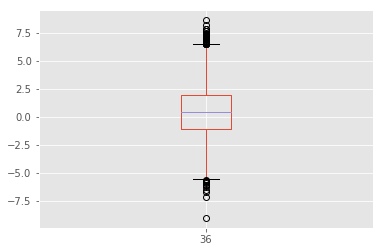

column name: 37


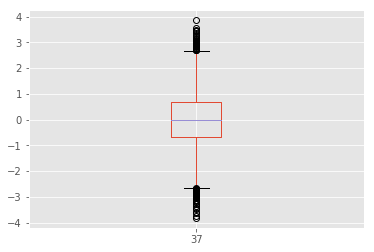

column name: 38


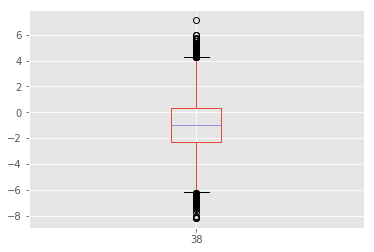

column name: 39


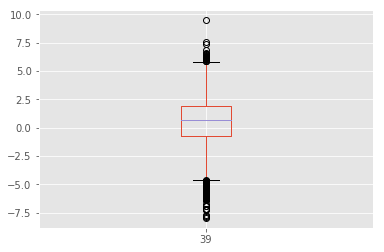

In [17]:
#check outlier
from scipy import stats

suspect_ire = []
numeric_columns = list(df.columns)
for col in numeric_columns:
    # Interquartile Range Method
    q25, q75 = np.percentile(df[col], 25), np.percentile(df_train[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    if len(outliers) > 0:
        suspect_ire.append(col)
        
# 畫可疑欄位的 box plot
for col in suspect_ire:
    print(f'column name: {col}')
    df[[col]].boxplot()
    plt.show()


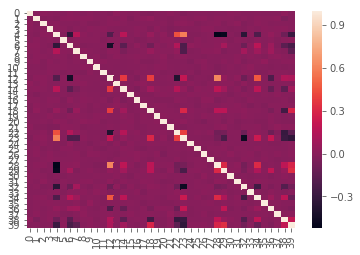

In [18]:
# check correlation
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

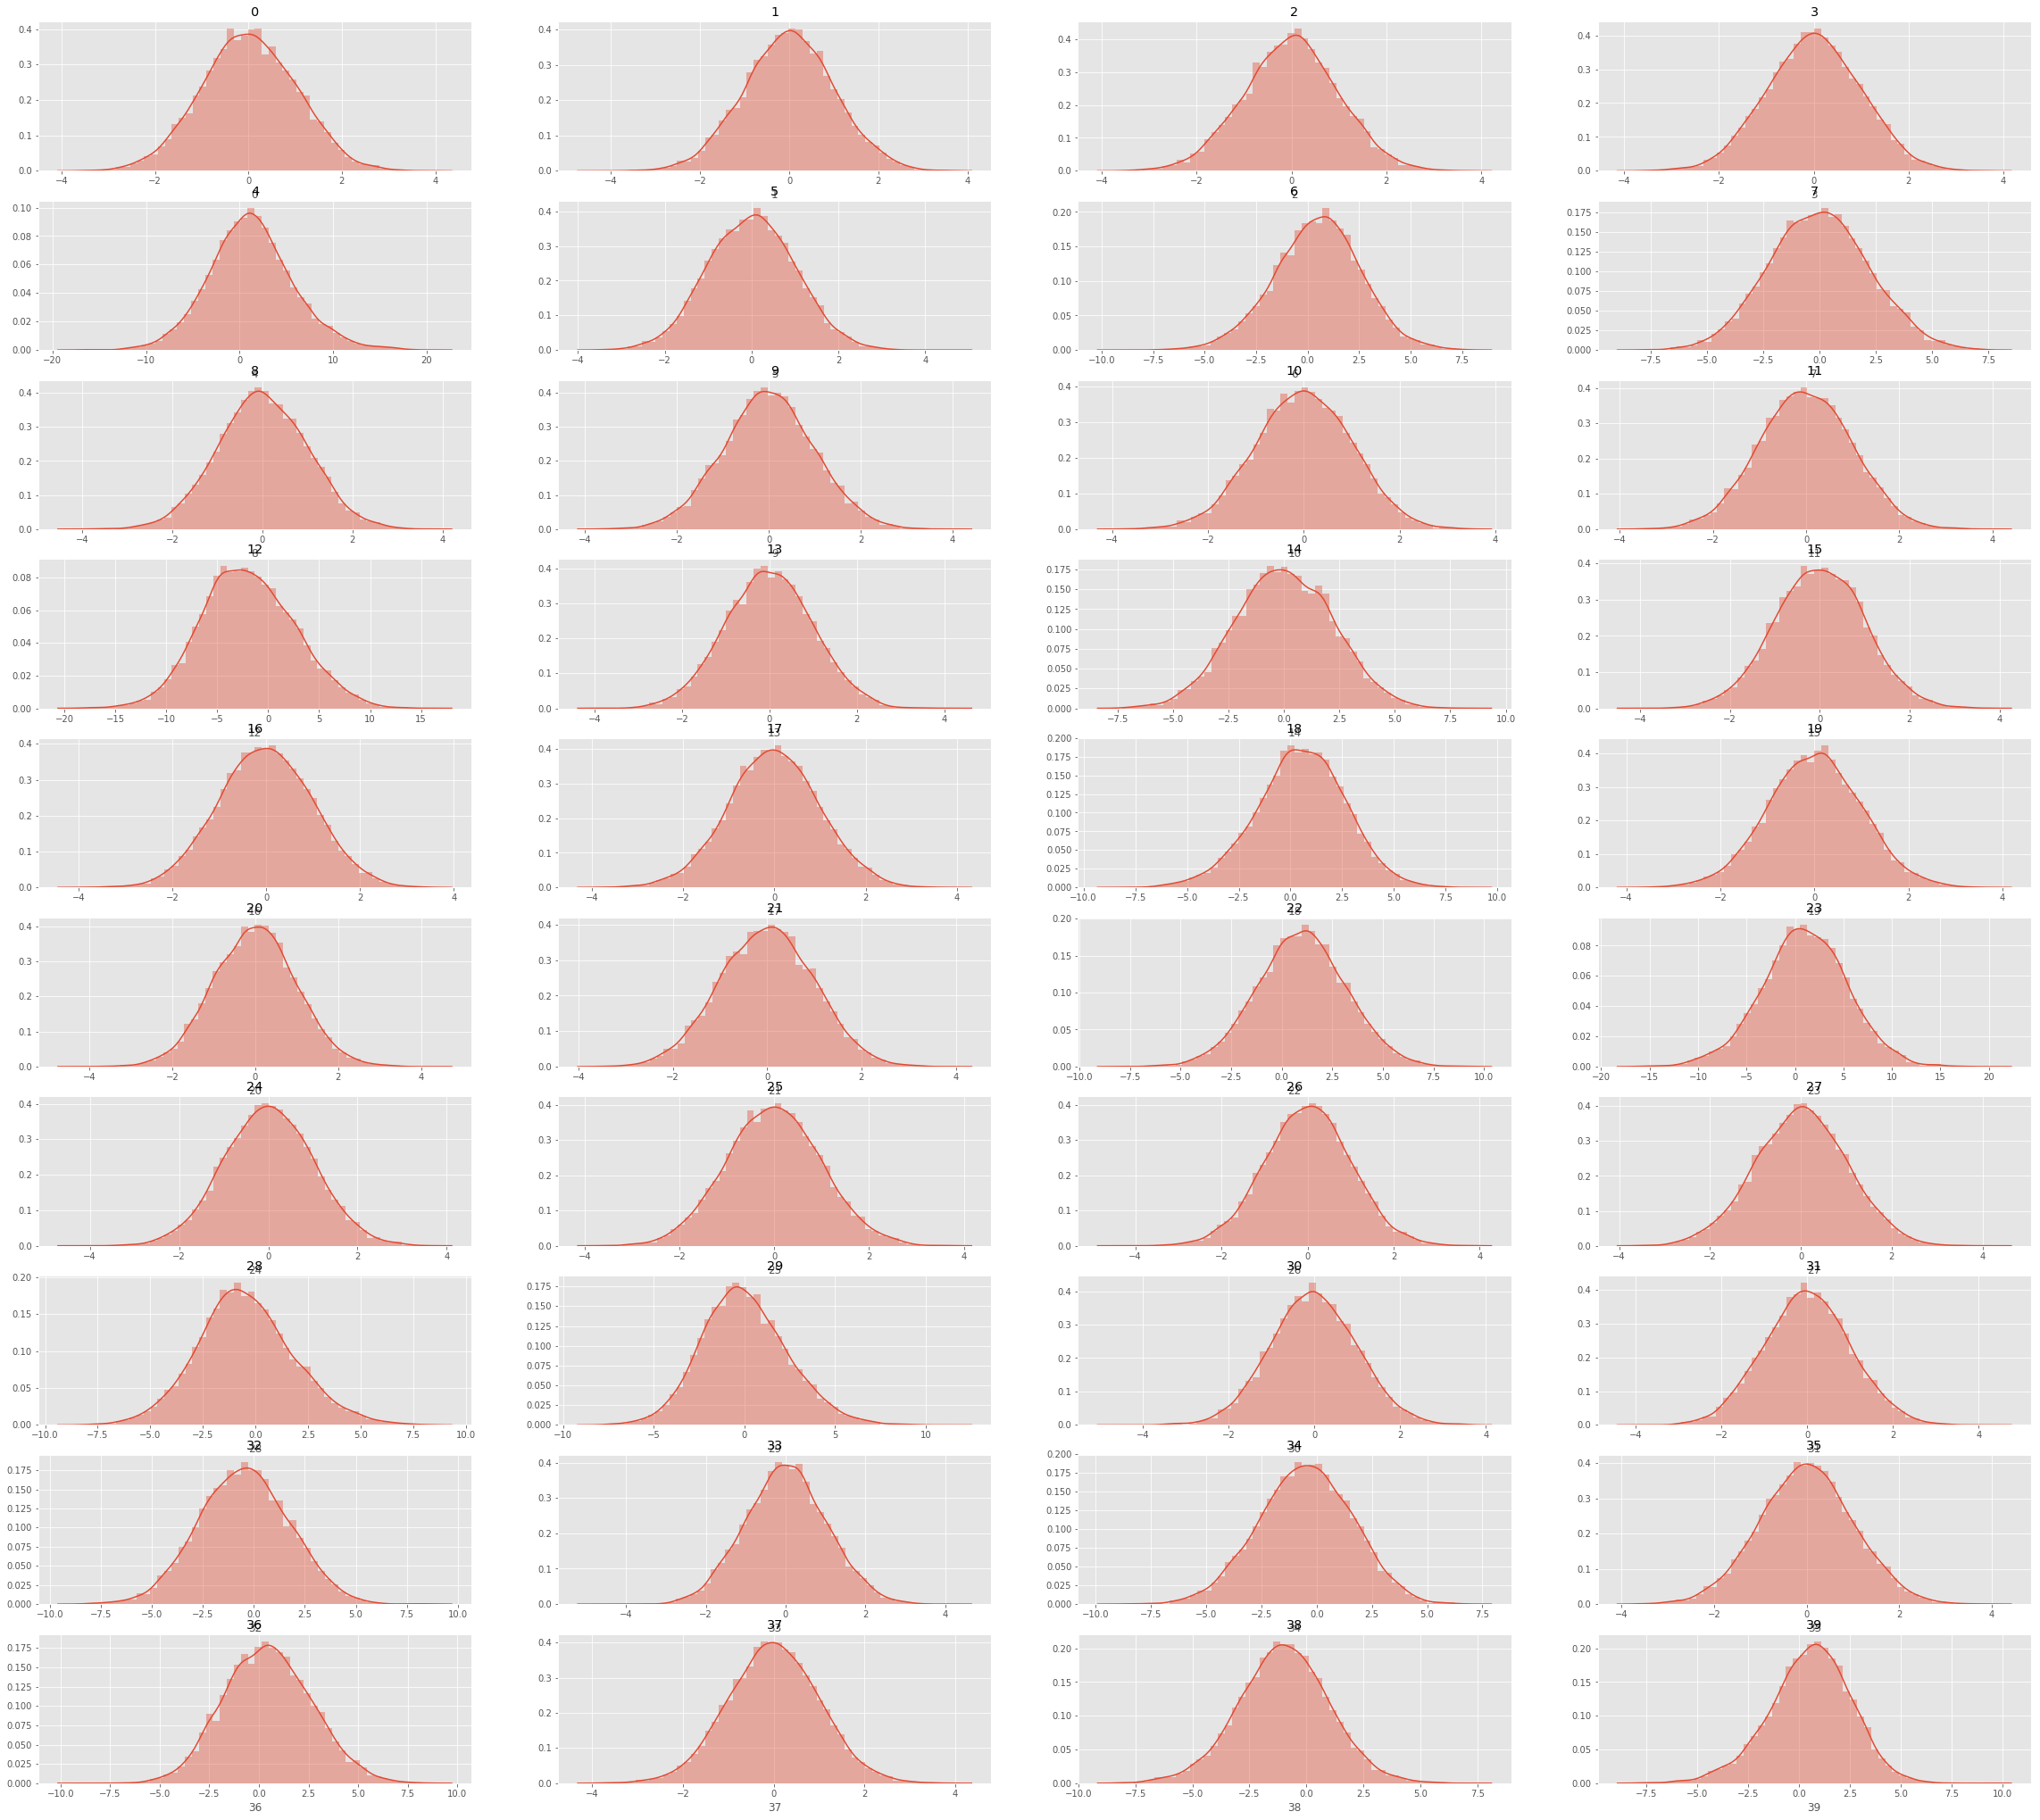

In [30]:
# check distribution
plt.figure(figsize = (40,40))

ncols = 4
nrows = len(df.columns) / ncols  + 1

for i,col in enumerate(df.columns):
    plt.subplot(nrows, ncols, i+1)
    plt.title(col)
    sns.distplot(df[col])
plt.show()


In [31]:
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
best_model = None
n_components_range = range(1, 8)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(df)
    aic = gmm.aic(df)
    if aic < lowest_bic:
        lowest_bic = aic
        best_model = gmm
            
best_gmm.fit(df)
gmm_train = best_gmm.predict_proba(df_train)
gmm_test = best_gmm.predict_proba(df_test)

In [32]:
best_gmm.means_

array([[-2.78696135e-03,  2.28591755e-02, -1.35008326e-03,
         6.10961577e-03,  7.93519003e-01,  1.57754319e-02,
         1.02733598e+00, -1.01654455e+00,  2.38614727e-02,
         7.32292439e-03, -1.38497494e-02, -7.42834490e-03,
        -3.93769992e+00,  2.19977317e-04, -9.65219222e-01,
        -6.23676166e-03, -4.17816664e-03,  1.18844720e-03,
         9.88747293e-01, -7.14967446e-03,  2.24284859e-02,
         1.84305764e-02,  1.02581083e+00,  1.46818360e+00,
         4.98874905e-02,  5.38960369e-03, -6.68496869e-03,
        -5.05044190e-03, -9.91108851e-01,  9.91760662e-01,
        -2.26211973e-02, -2.31599369e-02, -9.45309826e-01,
         4.28792662e-02, -1.04063570e+00,  9.06770539e-03,
         9.38789857e-01, -2.95646531e-02, -1.01723487e+00,
         1.00366781e+00],
       [ 3.44146720e-02, -1.03331907e-02, -4.76893310e-03,
         2.13863313e-02,  8.25807689e-01,  1.73784897e-02,
         1.01258913e+00,  9.76214635e-01,  1.54920152e-02,
        -2.07420020e-02, -5.83

In [33]:
best_gmm.covariances_

array([[[ 1.01500679e+00,  6.85427199e-03,  3.64479020e-02, ...,
         -9.48832876e-03,  1.09641254e-01, -5.05978657e-02],
        [ 6.85427199e-03,  1.00391132e+00, -1.23497721e-02, ...,
          4.43251979e-02, -1.25834294e-01, -5.13785343e-02],
        [ 3.64479020e-02, -1.23497721e-02,  9.77542357e-01, ...,
          7.54091088e-03, -4.75159737e-02,  4.43725706e-02],
        ...,
        [-9.48832876e-03,  4.43251979e-02,  7.54091088e-03, ...,
          9.95887407e-01,  4.77022431e-03, -5.75719661e-03],
        [ 1.09641254e-01, -1.25834294e-01, -4.75159737e-02, ...,
          4.77022431e-03,  4.55841411e+00,  8.60790886e-01],
        [-5.05978657e-02, -5.13785343e-02,  4.43725706e-02, ...,
         -5.75719661e-03,  8.60790886e-01,  2.68904065e+00]],

       [[ 1.02964328e+00, -1.55969906e-02, -7.14509497e-03, ...,
         -6.90892054e-03,  2.30197117e-02,  1.41305470e-01],
        [-1.55969906e-02,  1.04815723e+00, -1.43452056e-02, ...,
          2.50248239e-02, -1.30121521e

In [34]:
logreg = linear_model.LogisticRegression()
logreg.fit(gmm_train, df_label)
y_pred = logreg.predict(gmm_test)

t = list(range(1,9001))
data = {'Id': t, 'Solution': list(y_pred)}
re = pd.DataFrame(data=data)

re.to_csv('re3.csv', index=False)

D:\Anacoda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacoda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
